## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix


## Distance utilities

In [3]:
def getRandomCordinates(numberOfCoordinates, numberOfDimensions=2):
    return np.random.randint(0, numberOfCoordinates, (numberOfCoordinates, numberOfDimensions))


def getDistanceTwoNodes(df, point1, point2):
    if (point1 not in df.index or point2 not in df.index):
        return -1
    return df[point1][point2]


def getDistance(df, listOfPoints):
    totalDistance = 0
    for i in range(1, len(listOfPoints)):
        d = getDistanceTwoNodes(df, listOfPoints[i-1], listOfPoints[i])
        if (d == -1):
            return -1
        totalDistance += d
    return totalDistance


def getDistanceMatrix(df):
    return pd.DataFrame(distance_matrix(df.values, df.values), columns=df.index, index=df.index)

## Genetic algorithm Utilities

In [4]:
def mutation(paths):
    for path in paths[1:]:
        for i in range(np.random.randint(0, len(path)/2)):
            index = np.random.randint(0, len(path), 2)
            path[index[0]], path[index[1]] = path[index[1]], path[index[0]]
    return paths

def sortparents(parents, dfMatrix):
    return sorted(parents, key=lambda x: getDistance(dfMatrix, np.append(x, x[0])))

def randomCrossOver(paths):
    index = np.random.randint(0, len(paths[0]), 2)
    selection = paths[0][index[0]:index[1]]
    mask = np.isin(paths[1], np.setdiff1d(paths[1], selection))
    return np.append(paths[1][mask], selection)


def crossOver(paths, totalPaths=10):
    newPaths = [paths[0]]
    for i in range(1, totalPaths):
        index = np.random.randint(0, len(paths), 2)
        newPaths.append(randomCrossOver([paths[index[0]], paths[index[1]]]))
    return newPaths


## Defining Genetic Algorithm

In [5]:
def GeneticAlgorithm(df, matrixFormat=False, totalPaths=100, maxCrossOverSize=5, takeBest=5, maxiterations=2000):
    results = []
    dfMatrix = df
    if(not matrixFormat):
        dfMatrix = getDistanceMatrix(df)
    paths = [np.random.permutation(df.index) for i in range(totalPaths)]

    for i in range(maxiterations):
        paths = sortparents(paths, dfMatrix)
        results.append((i, paths[0], getDistance(
            dfMatrix, np.append(paths[0], paths[0][0]))))
        paths = crossOver(paths[:takeBest],
                          np.random.randint(0, maxCrossOverSize))
        paths = mutation(paths)

    dfResults = pd.DataFrame(results, columns=[
                             'Iteration', 'Path', 'Distance'])
    return dfResults

## Reading/Generating Data

In [6]:
df = pd.DataFrame(getRandomCordinates(30), columns=['x', 'y'])
#df = pd.read_csv("../../data/adjacency_matrix.csv", index_col=0)
df

,x,y
0,1,5
1,1,5
2,4,5
3,9,0
4,5,2
5,1,5
6,4,0
7,1,2
8,1,1
9,5,7


## Results and graphs

In [7]:
dfResults = GeneticAlgorithm(df, matrixFormat = False, takeBest=10, maxiterations=100000)
dfResults.to_csv('resultados_notebook.csv')

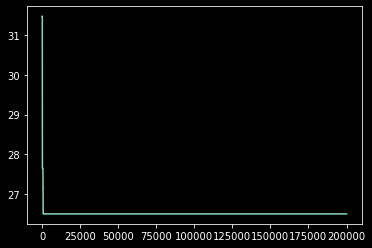

In [8]:
plt.plot(dfResults['Iteration'], dfResults['Distance'])

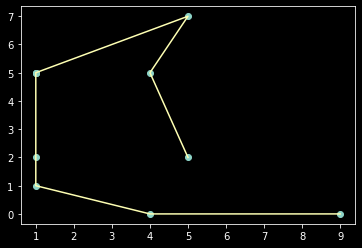

In [9]:
arr = [df.iloc[i] for i in dfResults["Path"].iloc[-1]]
order = pd.DataFrame(arr, columns=['x', 'y'])

arr.append(arr[0])
plt.plot(df["x"], df["y"], 'o')
plt.plot(order["x"], order["y"])
plt.savefig("../../graphs/")